In [16]:
import os
import numpy as np
from io import BytesIO
import tempfile
from glob import glob

#%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import lsst.daf.persistence as dafPersist
import lsst.afw.display as afwDisplay
import lsst.afw.image as afwImage
import lsst.afw.fits as afwFits
import lsst.geom
import lsst.alert.packet
afwDisplay.setDefaultBackend('matplotlib')
import matplotlib.ticker as plticker
from astropy.visualization import (ZScaleInterval, SqrtStretch, ImageNormalize)
from astropy.utils.console import ProgressBar
from astropy.nddata import CCDData

In [2]:
schema = lsst.alert.packet.Schema.from_file()

In [9]:
!ls /project/morriscb/src/ap_verify_hits2015/DM-25229/alerts

41091501.avro  41131949.avro  41175836.avro  41232425.avro  41364914.avro
41091503.avro  41131950.avro  41175837.avro  41232426.avro  41364915.avro
41091504.avro  41131951.avro  41175838.avro  41232427.avro  41364916.avro
41091505.avro  41131952.avro  41175839.avro  41232428.avro  41364917.avro
41091506.avro  41131953.avro  41175840.avro  41232429.avro  41364918.avro
41091507.avro  41131954.avro  41175841.avro  41232430.avro  41364919.avro
41091508.avro  41131955.avro  41175842.avro  41232431.avro  41364920.avro
41091509.avro  41131956.avro  41175843.avro  41232432.avro  41364921.avro
41091510.avro  41131957.avro  41175844.avro  41232433.avro  41364922.avro
41091511.avro  41131958.avro  41175845.avro  41232434.avro  41364923.avro
41091512.avro  41131959.avro  41175846.avro  41232435.avro  41364924.avro
41091513.avro  41131960.avro  41175847.avro  41232436.avro  41364925.avro
41091514.avro  41131962.avro  41175848.avro  41232437.avro  41364926.avro
41091515.avro  41132101.avro  41175849

In [5]:
alert_files = glob('/project/morriscb/src/ap_verify_hits2015/DM-25229/alerts/*.avro')

In [6]:
len(alert_files)

5020

let's count diaSources:

In [10]:
REPO = '/project/morriscb/src/ap_verify_hits2015/DM-25229'
connection = sqlite3.connect(f'{REPO}/association.db')


In [11]:
pd.read_sql_query('select count(diaSourceId) from diaSource;', connection)


,count(diaSourceId)
0,675419


In [13]:
avro_file = alert_files[0]

In [14]:
with open(f'{avro_file}','rb') as f:
    writer_schema, data = schema.retrieve_alerts(f)
    print(avro_file.split('/')[-1], len(data))

41098723.avro 121


In [24]:
def plot_cutout_images(alert):
    
    
    with BytesIO(alert['cutoutDifference']) as bytesIO:
        cutoutDifference = CCDData.read(bytesIO, format="fits")
        
    with BytesIO(alert['cutoutTemplate']) as bytesIO:
        cutoutTemplate = CCDData.read(bytesIO, format="fits")
   
    plt.figure()
    plt.imshow(cutoutDifference.data)
    plt.figure()
    plt.imshow(cutoutTemplate.data)
    
    #return diffExposure

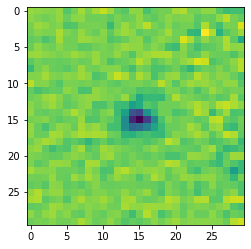

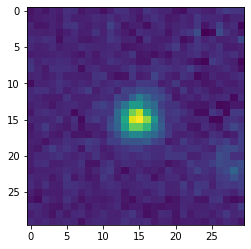

In [30]:
plot_cutout_images(data[2])

In [31]:
data[0].keys()

dict_keys(['alertId', 'diaSource', 'prvDiaSources', 'prvDiaForcedSources', 'prvDiaNondetectionLimits', 'diaObject', 'ssObject', 'cutoutDifference', 'cutoutTemplate'])

In [50]:
data[1]['diaObject']

{'diaObjectId': 177219039351799969,
 'ra': 155.79172955145793,
 'decl': -4.6502531121211925,
 'raErr': nan,
 'declErr': nan,
 'ra_decl_Cov': nan,
 'radecTai': 57090.25109844361,
 'pmRa': nan,
 'pmDecl': nan,
 'parallax': nan,
 'pmRaErr': nan,
 'pmDeclErr': nan,
 'parallaxErr': nan,
 'pmRa_pmDecl_Cov': nan,
 'pmRa_parallax_Cov': nan,
 'pmDecl_parallax_Cov': nan,
 'pmParallaxLnL': nan,
 'pmParallaxChi2': nan,
 'pmParallaxNdata': 0,
 'uPSFluxMean': nan,
 'uPSFluxMeanErr': nan,
 'uPSFluxSigma': nan,
 'uPSFluxChi2': nan,
 'uPSFluxNdata': 0,
 'gPSFluxMean': -1696.8397216796875,
 'gPSFluxMeanErr': 265.2115783691406,
 'gPSFluxSigma': 3491.140380859375,
 'gPSFluxChi2': 140.4910125732422,
 'gPSFluxNdata': 6,
 'rPSFluxMean': nan,
 'rPSFluxMeanErr': nan,
 'rPSFluxSigma': nan,
 'rPSFluxChi2': nan,
 'rPSFluxNdata': 0,
 'iPSFluxMean': nan,
 'iPSFluxMeanErr': nan,
 'iPSFluxSigma': nan,
 'iPSFluxChi2': nan,
 'iPSFluxNdata': 0,
 'zPSFluxMean': nan,
 'zPSFluxMeanErr': nan,
 'zPSFluxSigma': nan,
 'zPSFlux

In [32]:
def make_dataframe(packet):
    df = pd.DataFrame(packet['diaSource'], index=[0])
    df_prv = pd.DataFrame(packet['prvDiaSources'])
    return pd.concat([df,df_prv], ignore_index=True)



In [51]:
df = make_dataframe(data[1])

<ErrorbarContainer object of 3 artists>

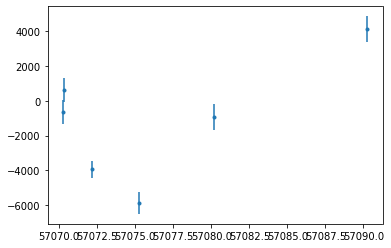

In [52]:
plt.figure()
plt.errorbar(df.midPointTai, df.psFlux, df.psFluxErr,fmt='.',ls='none')

/opt/lsst/software/stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-1a1d771/lib/python3.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


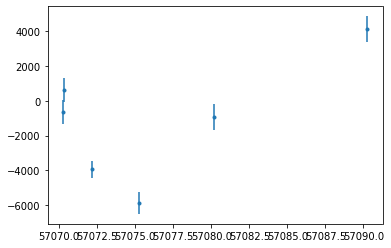

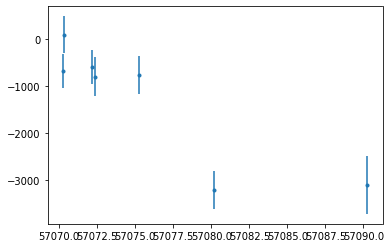

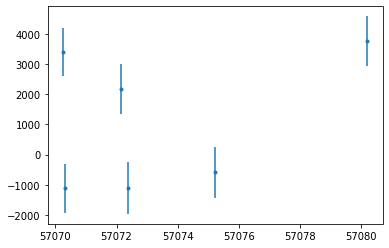

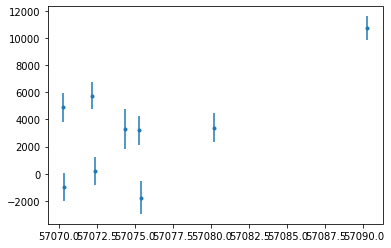

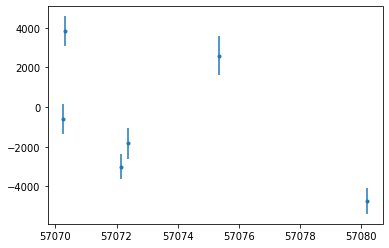

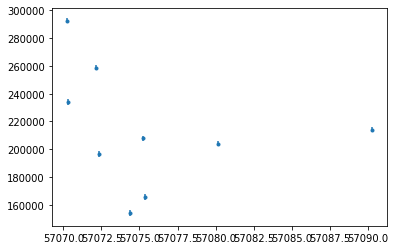

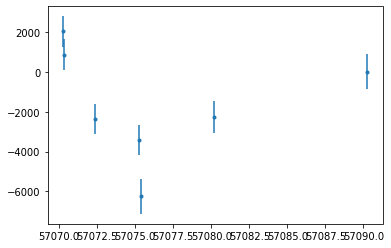

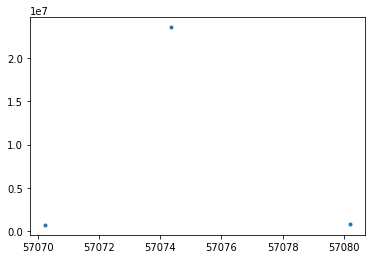

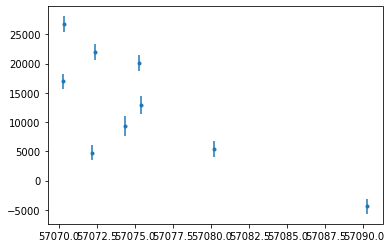

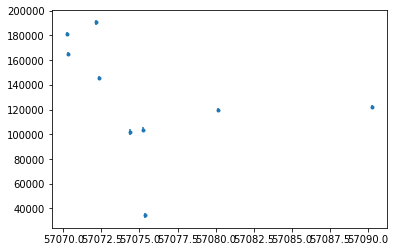

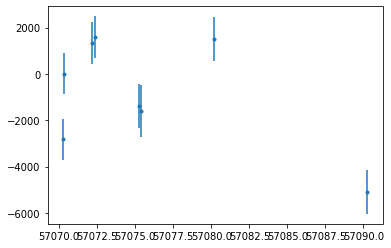

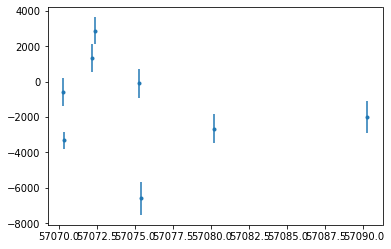

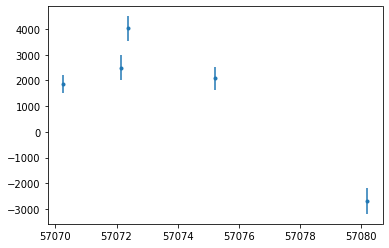

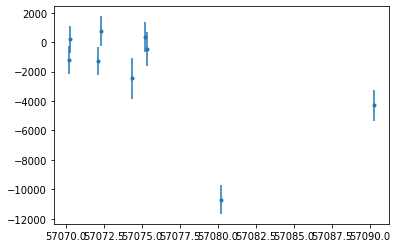

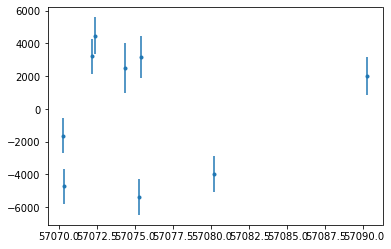

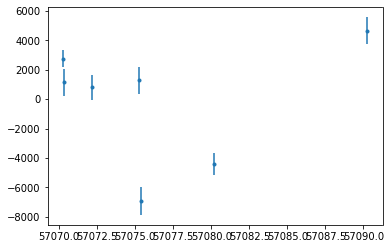

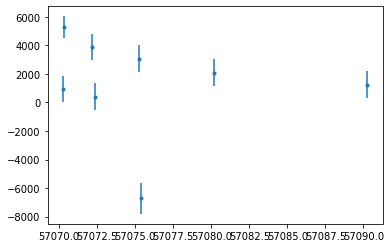

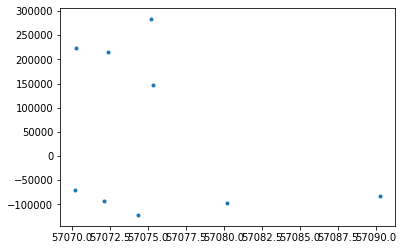

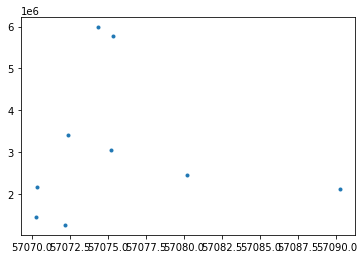

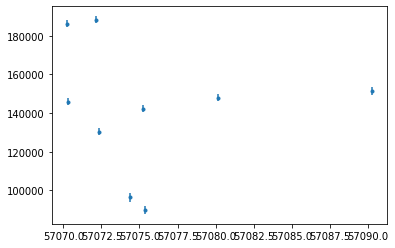

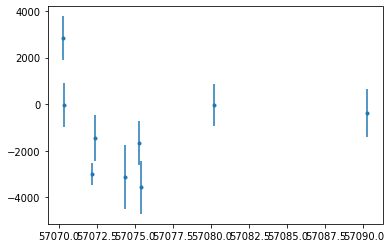

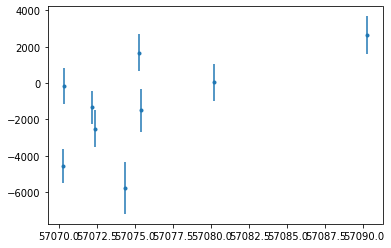

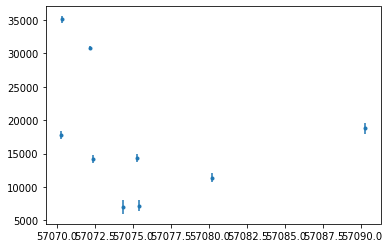

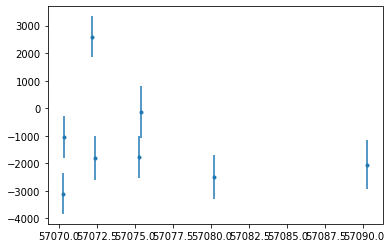

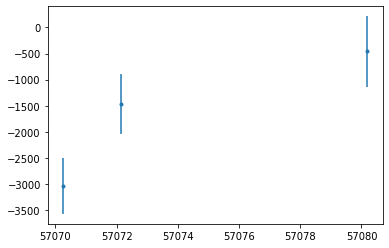

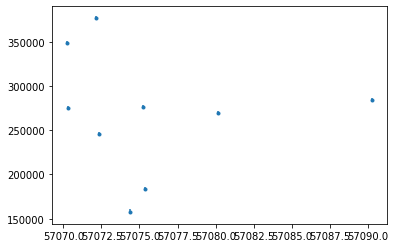

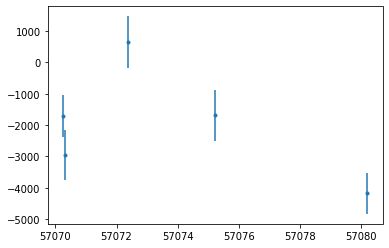

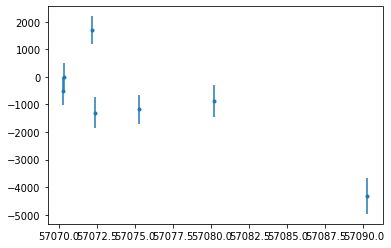

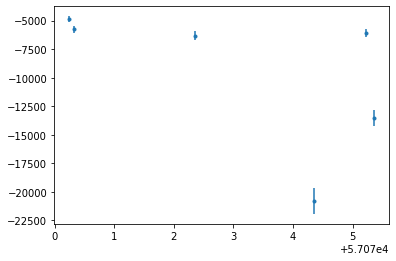

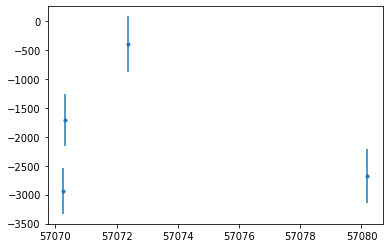

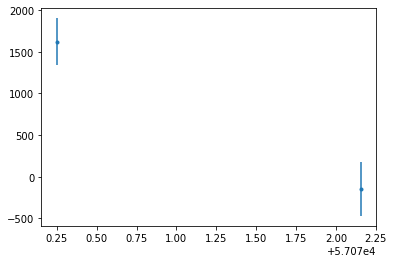

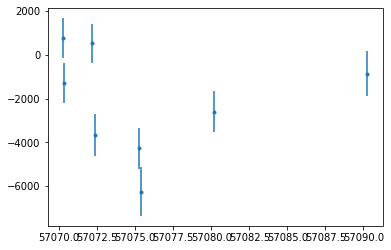

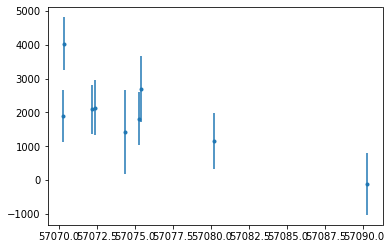

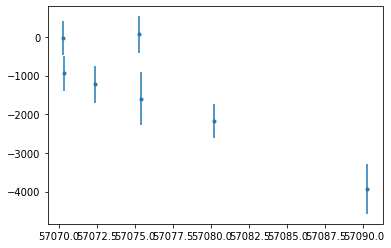

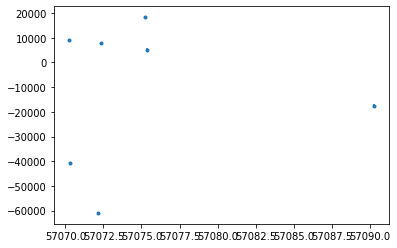

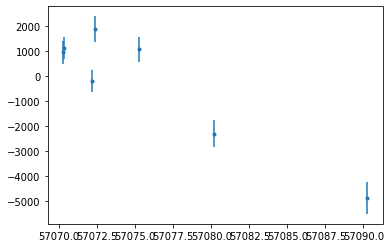

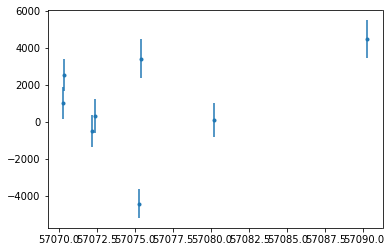

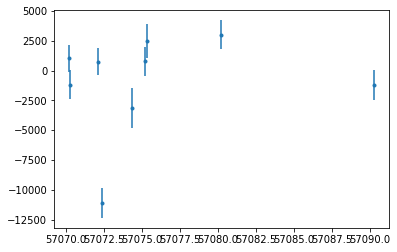

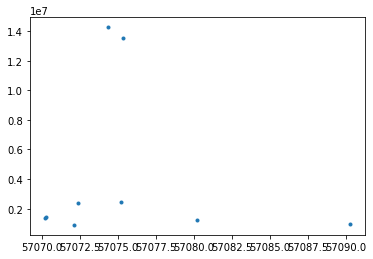

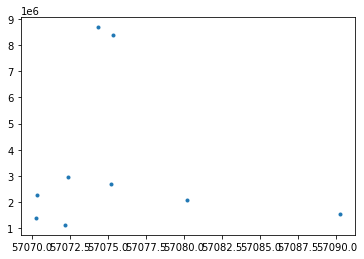

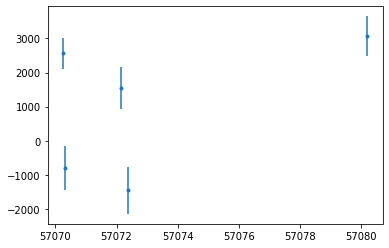

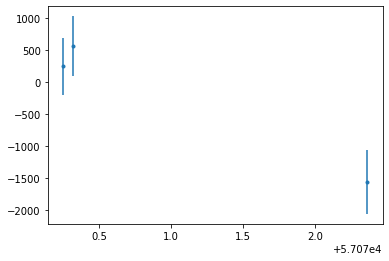

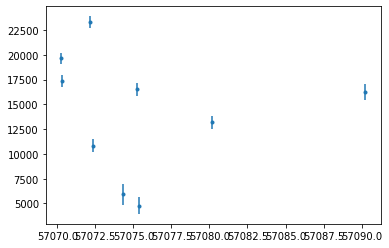

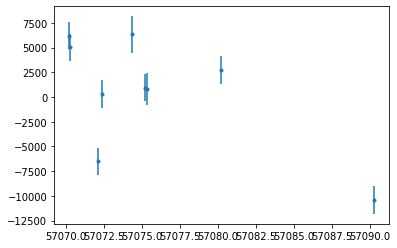

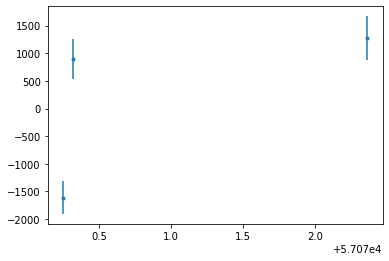

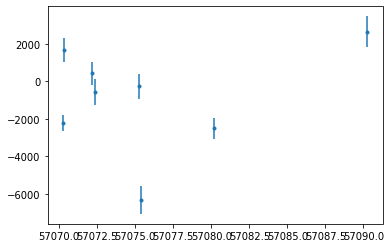

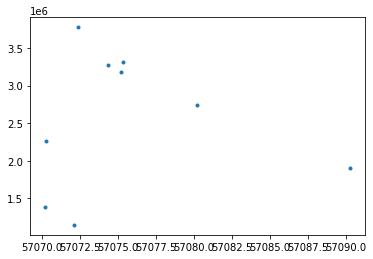

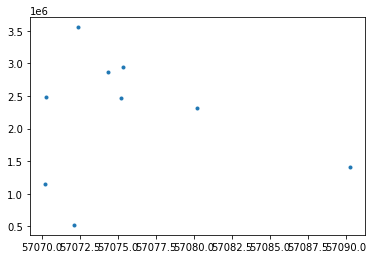

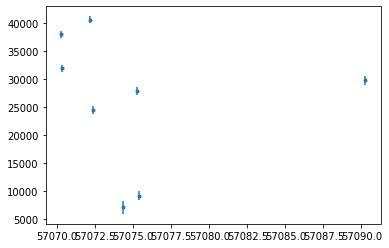

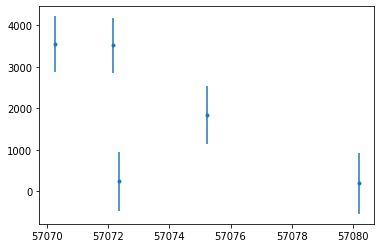

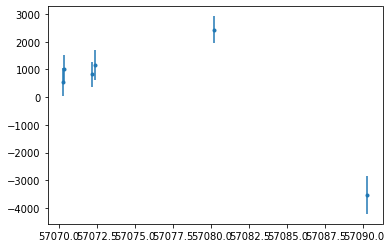

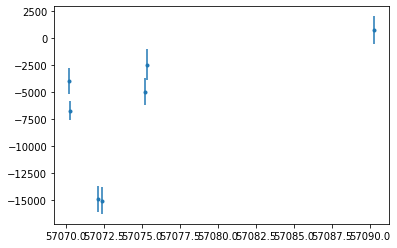

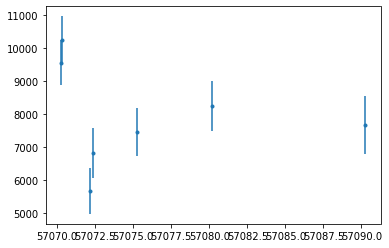

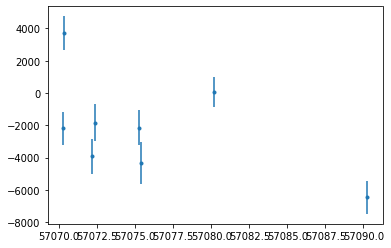

In [53]:
for packet in data:
    if packet['diaObject']['gPSFluxSigma'] > 1000:
        df = make_dataframe(packet)
        plt.figure()
        plt.errorbar(df.midPointTai, df.psFlux, df.psFluxErr,fmt='.',ls='none')

In [9]:
for avro_file in alert_files:
    with open(f'{avro_file}','rb') as f:
        writer_schema, data = schema.retrieve_alerts(f)
        print(avro_file.split('/')[-1], len(data))

41098723.avro 121
41225032.avro 105
41207433.avro 28
41538018.avro 70
41140660.avro 115
41207629.avro 50
41145647.avro 129
41182207.avro 139
41091505.avro 148
41105516.avro 242
41098511.avro 127
41537860.avro 80
41207449.avro 37
41255438.avro 69
41369605.avro 104
41536450.avro 142
41271821.avro 102
41102145.avro 153
41226408.avro 57
41142007.avro 144
41272042.avro 94
41142206.avro 246
41107154.avro 141
41103543.avro 147
41185801.avro 258
41226605.avro 49
41131947.avro 211
41175846.avro 118
41092946.avro 137
41226613.avro 38
41369435.avro 100
42159031.avro 213
41137155.avro 203
41142227.avro 175
41093126.avro 94
41363549.avro 187
41225001.avro 97
41257026.avro 119
41182233.avro 100
42159043.avro 94
41175807.avro 168
41098760.avro 111
41172411.avro 110
41266811.avro 81
41137149.avro 195
41533035.avro 61
41226634.avro 62
41147017.avro 133
41098501.avro 154
41364917.avro 154
41255443.avro 165
41261821.avro 178
41097140.avro 93
41147241.avro 150
41980455.avro 94
41135551.avro 118
41365124.a

KeyboardInterrupt: 